In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [203]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/GRASIM.csv")

In [204]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,GRASIM,EQ,405.80,429.9,438.3,425.00,438.3,438.30,432.24,101578,4.390621e+12,NaN,NaN,NaN
1,2000-01-04,GRASIM,EQ,438.30,437.5,440.0,420.05,439.5,437.15,428.27,126117,5.401216e+12,NaN,NaN,NaN
2,2000-01-05,GRASIM,EQ,437.15,420.1,447.9,412.00,430.0,439.60,436.10,163877,7.146660e+12,NaN,NaN,NaN
3,2000-01-06,GRASIM,EQ,439.60,449.9,474.8,449.90,474.8,474.80,474.68,44248,2.100384e+12,NaN,NaN,NaN
4,2000-01-07,GRASIM,EQ,474.80,472.0,512.8,472.00,512.8,512.80,512.61,188564,9.666049e+12,NaN,NaN,NaN


In [205]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [206]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1752.963447,1753.665690,1779.806417,1726.919195,1752.879881,1753.151150,1753.952433,4.810774e+05,5.041394e+13,21712.739821,2.109953e+05,0.495072
std,1152.148007,1152.356342,1165.939635,1138.711933,1151.702343,1152.009612,1152.518031,9.504433e+05,8.393759e+13,24345.564512,4.590644e+05,0.169116
min,172.500000,170.250000,176.800000,165.950000,173.000000,172.500000,173.410000,5.230000e+02,1.596022e+10,189.000000,4.730000e+02,0.063100
25%,810.462500,812.700000,824.012500,798.687500,810.350000,811.175000,811.777500,6.769700e+04,1.164514e+13,4710.250000,3.214000e+04,0.373100
50%,1357.225000,1355.000000,1377.450000,1338.550000,1359.500000,1358.425000,1356.720000,1.360035e+05,2.466485e+13,9620.000000,7.014900e+04,0.492800
75%,2662.750000,2668.675000,2700.000000,2625.137500,2663.750000,2662.750000,2668.345000,4.253732e+05,5.685606e+13,33442.750000,2.207040e+05,0.621000
max,5286.100000,5286.000000,5361.050000,5266.100000,5275.500000,5286.100000,5290.460000,2.535892e+07,2.516802e+15,316677.000000,1.767942e+07,0.981500


In [207]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [208]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [209]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [210]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [211]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [212]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [213]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.801556,2.128405,1312.35,1233546,NaN
5302,2.385321,0.848485,1331.20,1236334,NaN
5303,2.108012,0.276646,1341.15,1283746,NaN
5304,2.792164,-0.273184,1350.70,1793007,NaN
5305,5.581395,4.452310,1401.75,3261678,NaN


In [214]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [215]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [216]:
#Define the prediction model
model = RandomForestRegressor()

In [217]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [218]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9449305927097467


In [219]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [220]:
predictions = model.predict(X_Check)

In [221]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

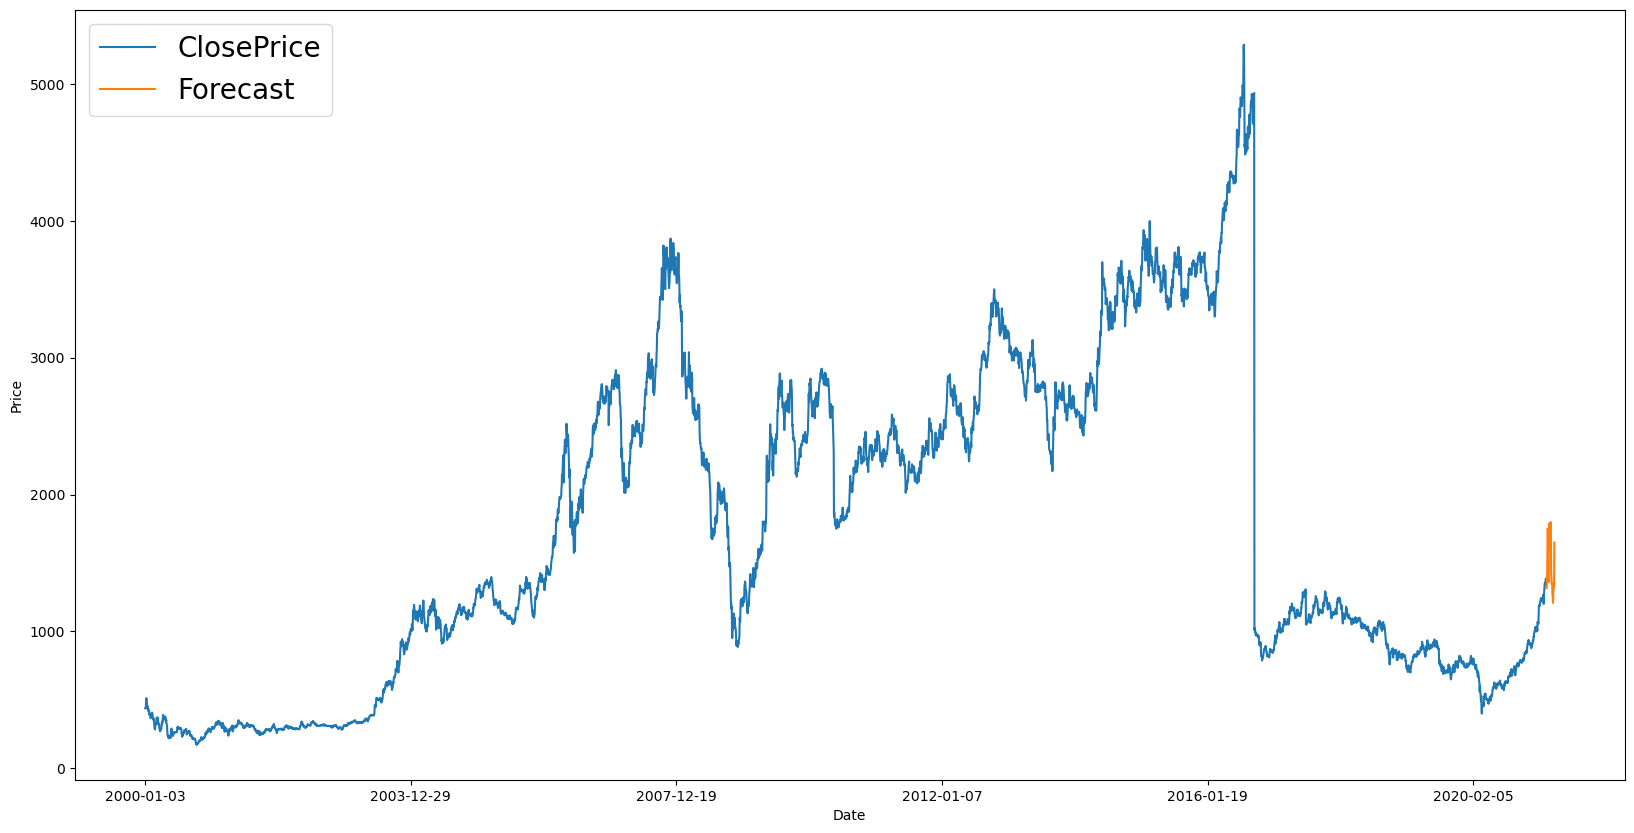

In [222]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')